In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import re

In [11]:
#Dictionaries
dictall = {1 : 'Protestant', 
          2 : 'Roman Catholic', 
          3 : 'Mormon', 
          4 : 'Orthodox', 
          5 : 'Jewish',
          6 : 'Muslim',
          7 : 'Buddhist',
          8 : 'Hindu',
          9 : 'Atheist',
          10 : 'Agnostic',
          11 : 'No Religion',
          12 : 'Christian',
          13 : 'Unitarian',
          14 : 'Other',
          77 : 'Dont know',
          98 : '',
          99 : ''}
dict17 = {1 : 'Baptist',
          2 : 'Roman Catholic',
          5 : 'Evangelical',
          6 : "Jehovah's Witnesses",
          7 : 'Jewish',
          8 : 'Lutheran',
          10 : 'Mormon',
          11 : 'Muslim',
          12 : 'Orthodox',
          13 : 'Pentecostal',
          14 : 'Presbyterian',
          15 : 'Protestant',
          16 : 'Seventh-day Adventist',
          19 : 'Unitarian/Universalist',
          20 : 'Buddhist',
          21 : 'Hindu',
          22 : 'Christian',
          23 : 'Non-denominational',
          24 : 'Episcopalian/Anglican',
          25 : 'Methodist',
          26 : 'Church of Christ, or Disciples of Christ',
          27 : 'Church of God',
          28 : 'Congregational',
          29 : 'Holiness',
          90 : 'No Religion',
          95 : 'Atheist',
          96 : 'Agnostic',
          97 : 'Other',
          98 : '',
          99 : ''}

dict16 = {1 : 'Baptist',
          2 : 'Roman Catholic',
          5 : 'Evangelical',
          6 : "Jehovah's Witnesses",
          7 : 'Jewish',
          8 : 'Lutheran',
          10 : 'Mormon',
          11 : 'Muslim',
          12 : 'Orthodox',
          13 : 'Pentecostal',
          14 : 'Presbyterian',
          15 : 'Protestant',
          16 : 'Seventh-day Adventist',
          19 : 'Unitarian',
          20 : 'Buddhist',
          21 : 'Hindu',
          22 : 'Christian',
          23 : 'Non-denominational',
          24 : 'Episcopalian/Anglican',
          25 : 'Methodist',
          26 : 'Church of Christ',
          28 : 'Congregational',
          29 : 'Holiness',
          90 : 'No Religion',
          95 : 'Atheist',
          96 : 'Agnostic',
          97 : 'Other',
          98 : '',
          99 : ''}

dict14 = {1 : 'Protestant',
          2 : 'Roman Catholic',
          3 : 'Mormon',
          4 : 'Orthodox',
          5 : 'Jewish',
          6 : 'Muslim',
          7 : 'Buddhist',
          8 : 'Hindu',
          9 : 'Atheist',
          10 : 'Agnostic',
          11 : 'Other',
          12 : 'No Religion',
          13 : 'Christian',
          14 : 'Unitarian',
          99 : '' }


In [16]:
#Load datasets
re2014 = pd.read_csv(r"C:\Users\Admin\Documents\JupyterNotebooks\Religion Datasets\PRRI 2014 American Values Survey.csv")
re2015 = pd.read_csv(r"C:\Users\Admin\Documents\JupyterNotebooks\Religion Datasets\PRRI 2015 American Values Survey.csv")
re2016 = pd.read_csv(r"C:\Users\Admin\Documents\JupyterNotebooks\Religion Datasets\PRRI 2016 American Values Survey.csv")
re2017 = pd.read_csv(r"C:\Users\Admin\Documents\JupyterNotebooks\Religion Datasets\PRRI 2017 American Values Survey.csv")
re2018 = pd.read_csv(r"C:\Users\Admin\Documents\JupyterNotebooks\Religion Datasets\PRRI 2018 American Values Survey.csv")
re2019 = pd.read_csv(r"C:\Users\Admin\Documents\JupyterNotebooks\Religion Datasets\PRRI 2019 American Values Survey.csv")

def religion_name(area, dic):
    # replace list of names
    for key, value in dic.items():
        if key == area:
            area = value
            area = area.strip()
    return area
#Homogenize religion names
re2014['RELIG'] =re2014.apply(lambda x: religion_name(x['RELIG'], dict14), axis = 1).replace(r'', np.NaN) 
re2015['RELIG'] =re2015.apply(lambda x: religion_name(x['RELIG'], dictall), axis = 1).replace(r'', np.NaN) 
re2016['RELIG'] =re2016.apply(lambda x: religion_name(x['RELIG'], dict16), axis = 1).replace(r'', np.NaN) 
re2017['RELIG'] =re2017.apply(lambda x: religion_name(x['RELIG'], dict17), axis = 1).replace(r'', np.NaN) 
re2018['RELIG'] =re2018.apply(lambda x: religion_name(x['RELIG'], dictall), axis = 1).replace(r'', np.NaN) 
re2019['RELIG'] =re2019.apply(lambda x: religion_name(x['RELIG'], dictall), axis = 1).replace(r'', np.NaN) 

#Obtain data from MICHIGAN only
MI_re2014 = re2014[re2014['STATE'] == 'MI'].groupby('RELIG').size().rename('2014').to_frame()

MI_re2015 = re2015[re2015['STATE'] == 'MI'].groupby('RELIG').size().rename('2015').to_frame()

MI_re2016 = re2016[re2016['STATE'] == 'MI'].groupby('RELIG').size().rename('2016').to_frame()

MI_re2017 = re2017[re2017['STATE'] == 'MI'].groupby('RELIG').size().rename('2017').to_frame()

MI_re2018 = re2018[re2018['STATE'] == 'MI'].groupby('RELIG').size().rename('2018').to_frame()

MI_re2019 = re2019[re2019['STATE'] == 'MI'].groupby('RELIG').size().rename('2019').to_frame()


#Merge dfs to not loose any religion
merged = pd.concat([MI_re2014, MI_re2015, MI_re2016, MI_re2017, MI_re2018, MI_re2019]).fillna(0).groupby(level=0).sum()

#obtain percentages    
for column in merged:
    tot = sum(merged[column])
    merged[column] = round(merged[column]*100/tot, 2)
        
merged

,2014,2015,2016,2017,2018,2019
RELIG,,,,,,
Agnostic,4.64,5.38,6.45,4.84,8.33,5.63
Atheist,0.66,4.30,3.23,1.61,7.14,8.45
Baptist,0.00,0.00,3.23,4.84,0.00,0.00
Buddhist,0.66,0.00,0.00,0.00,0.00,0.00
Christian,12.58,15.05,12.90,8.06,14.29,21.13
Hindu,0.00,0.00,0.00,0.00,1.19,1.41
Jewish,0.00,2.15,1.61,0.00,0.00,1.41
Lutheran,0.00,0.00,0.00,1.61,0.00,0.00
Methodist,0.00,0.00,0.00,4.84,0.00,0.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_9668\896147696.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('cool_r', len(religions))


<Figure size 1000x1000 with 0 Axes>

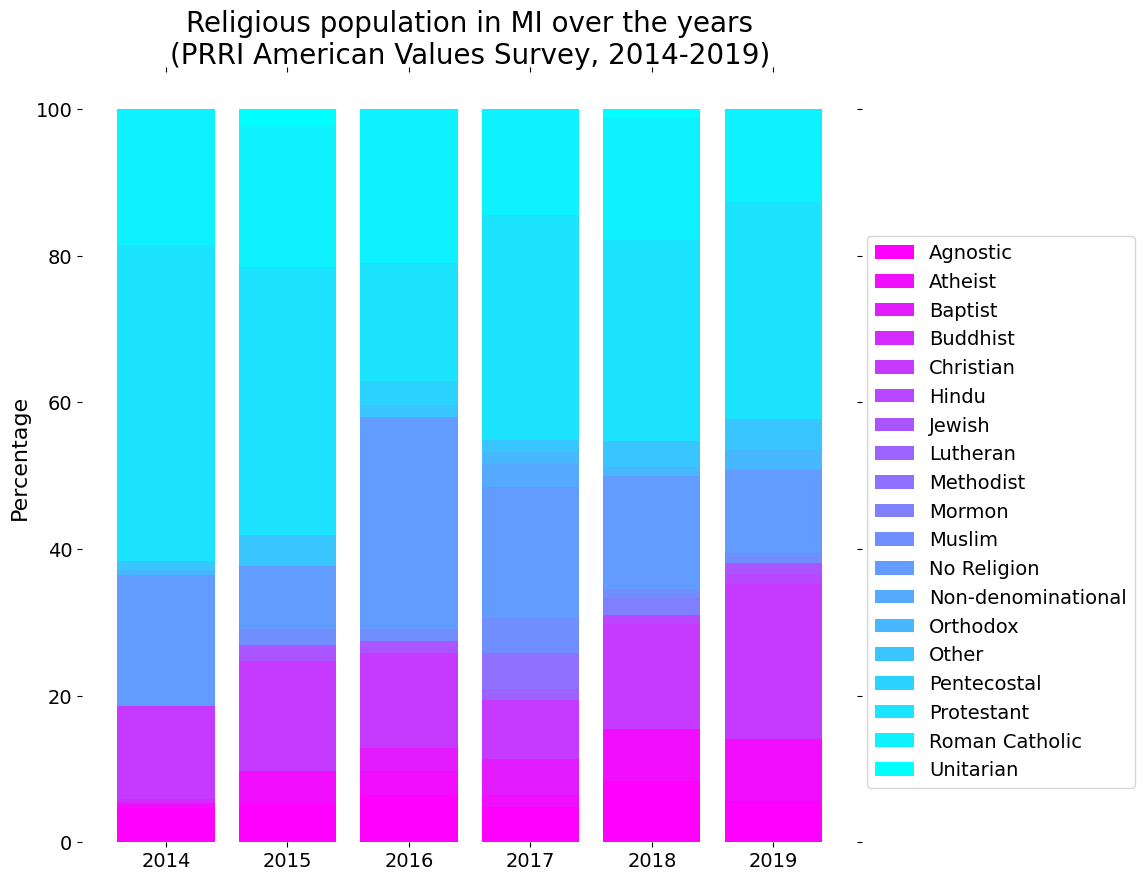

In [15]:
religions = merged.index.tolist()
ticks = merged.columns.tolist()
years = list(range(len(ticks)))

plt.clf()

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,15)
plt.setp(ax, xticks=years, xticklabels=ticks)

cmap = mpl.cm.get_cmap('cool_r', len(religions))



dif=np.zeros(len(ticks))
for i in range(len(merged)):
    ax.bar(years, merged.iloc[i][:].values, width=0.8, bottom=dif, label=religions[i], color=cmap(i))
    dif +=  merged.iloc[i][:].values


ax.set_ylabel('Percentage', fontsize=16)
ax.set_title('Religious population in MI over the years\n(PRRI American Values Survey, 2014-2019)', fontsize=20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_ylim(0, 105)  
ax.legend(bbox_to_anchor =(1, 0.8), fontsize=14)

# remove all the ticks (both axes), and tick labels on the Y axis
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')

# remove the frame of the chart
for spine in ax.spines.values():
    spine.set_visible(False)


#plt.savefig('MI_Religion.png', bbox_inches = 'tight', dpi=100)
plt.show()